## Task 1

1. Write Python code to plot three Poisson distributions, eqn(1), for ⟨n⟩= 1, 5, 10.

Poisson Distribution given by,

 $P(n)=\frac{\langle n \rangle}{n!}^ne^{-\langle n \rangle}$, $\langle n \rangle=\Sigma^{N}_{n=0}nP(n)$

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [58]:
'''def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)'''

def avg_n(N,L):
    avg_n_val=N*(1/L)
    return avg_n_val

'''def p(n, mean_n):         #This method overflows for large n, creating negative probabilities, was replaced with log-space version below
    """Calculate Poisson probability P(n) directly from mean_n"""
    if n > 100:  # factorial overflow protection
        return 0
    else:
        prob = ((mean_n**n) / factorial(n)) * np.exp(-mean_n)
        return prob'''


from scipy.special import gammaln
import numpy as np

def p(n, mean_n):
    """Calculate Poisson probability in log-space to avoid overflow"""
    # Work entirely in log space
    log_prob = n * np.log(mean_n) - mean_n - gammaln(n + 1)#log factorial
    prob = np.exp(log_prob)
    
    # Clamp to zero if negative due to numerical error
    if not np.isfinite(prob):
        return 0.0
    return max(0.0, prob)


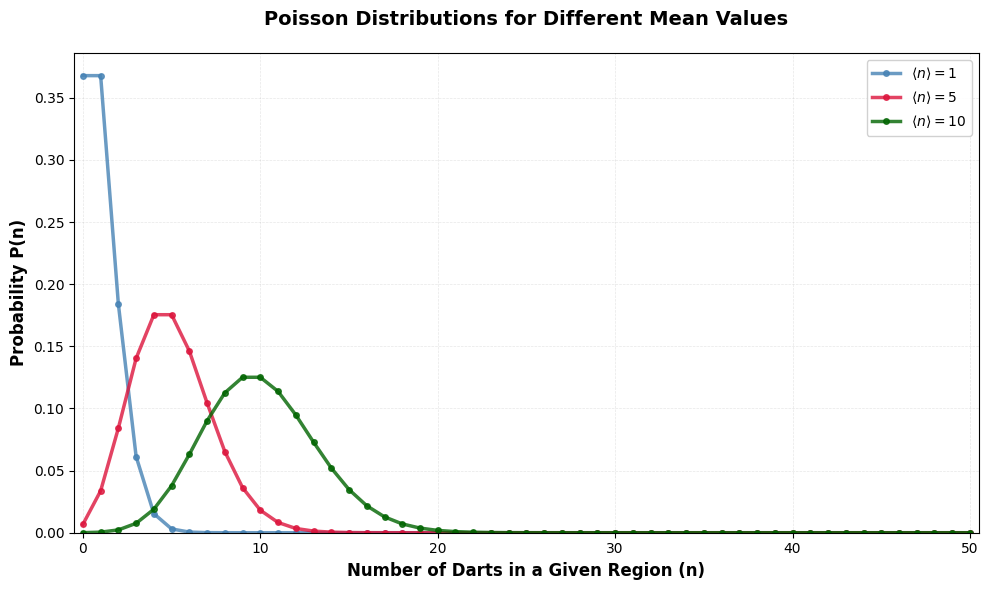

In [59]:
mean_n_values = [1, 5, 10]
N_max = 50  # Maximum n to consider

# Color palette for multiple lines
colors = ['steelblue', 'crimson', 'darkgreen', 'darkorange', 'purple', 'teal']


plt.figure(figsize=(10, 6))

'''for mean_n in mean_n_values:
    ns = np.arange(0, N_max + 1)  # Start from 0!
    p_values = [p(n, mean_n) for n in ns]
    
    plt.plot(ns, p_values, label=f'$\\langle n \\rangle = {mean_n}$', marker='o', markersize=3)'''

for idx, mean_n in enumerate(mean_n_values):
    ns = np.arange(0, N_max + 1)  # Start from 0!
    p_values = [p(n, mean_n) for n in ns]
    
    plt.plot(ns, p_values, 
             label=f'$\\langle n \\rangle = {mean_n}$', 
             marker='o', markersize=4, 
             linewidth=2.5, 
             alpha=0.8,
             color=colors[idx % len(colors)])

# Styling improvements
plt.title('Poisson Distributions for Different Mean Values', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Number of Darts in a Given Region (n)', 
           fontsize=12, fontweight='bold')
plt.ylabel('Probability P(n)', 
           fontsize=12, fontweight='bold')
plt.legend(fontsize=10, framealpha=0.9, loc='best')
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.xlim(-0.5, N_max + 0.5)
plt.ylim(0, None)  # Auto-scale y-axis with 0 baseline

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-1/Assignments/Comp_Sim_Assignment_4/plots/task1.pdf')
plt.show()

## Task 2

2. Set N = 50 (to avoid large numbers for the factorial) and write code to compute the sums of $\Sigma^{N}_{n=0}P(n)$, $\Sigma^{N}_{n=0}nP(n)$ and $\Sigma^{N}_{n=0}n**2P(n)$ for the three different values of ⟨n⟩ given above. Verify that $P(n)$ is normalized. What are the values of
the standard deviation and variance? Present all your results in a table.

**Check Moments**

In [60]:
# %%
def zero_moment(p_values):
    """Check if the probabilities sum to 1."""
    return np.sum(p_values)

def first_moment(ns, p_values):
    """Calculate mean: Σ n*P(n)"""
    return np.sum(ns * p_values)

def second_moment(ns, p_values):
    """Calculate second moment: Σ n²*P(n)"""
    return np.sum((ns**2) * p_values)

def var_check(ns, p_values):
    """Calculate variance: E[n²] - E[n]²"""
    mean_val = first_moment(ns, p_values)
    second_mom = second_moment(ns, p_values)
    return second_mom - mean_val**2

In [61]:
N = 50  # As specified in the question
mean_n_values = [1, 5, 10]

total_probs = []
mean_vals = []
second_moments = []
variance_vals = []
std_devs = []

In [62]:
for mean_n in mean_n_values:
    ns = np.arange(0, N + 1)  # n from 0 to N
    p_values = np.array([p(n, mean_n) for n in ns])
    
    total_prob = zero_moment(p_values)
    mean_val = first_moment(ns, p_values)
    second_mom = second_moment(ns, p_values)
    variance_val = var_check(ns, p_values)
    std_dev = np.sqrt(variance_val)
    
    total_probs.append(total_prob)
    mean_vals.append(mean_val)
    second_moments.append(second_mom)
    variance_vals.append(variance_val)
    std_devs.append(std_dev)

# %%
# Create results table
import pandas as pd

results_df = pd.DataFrame({
    '⟨n⟩': mean_n_values,
    'Σ P(n)': total_probs,
    'Σ n·P(n)': mean_vals,
    'Σ n²·P(n)': second_moments,
    'Variance': variance_vals,
    'Std Dev': std_devs
})

print("\n" + "="*80)
print("TASK 2 RESULTS: Poisson Distribution Properties (N=50)")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# Verify results
print("\nVerification:")
for i, mean_n in enumerate(mean_n_values):
    print(f"\n⟨n⟩ = {mean_n}:")
    print(f"  Normalized? {abs(total_probs[i] - 1.0) < 1e-6} (sum = {total_probs[i]:.6f})")
    print(f"  Mean matches? {abs(mean_vals[i] - mean_n) < 1e-6} (calculated = {mean_vals[i]:.6f})")
    print(f"  Variance = ⟨n⟩? {abs(variance_vals[i] - mean_n) < 1e-2} (calculated = {variance_vals[i]:.6f})")



TASK 2 RESULTS: Poisson Distribution Properties (N=50)
 ⟨n⟩  Σ P(n)  Σ n·P(n)  Σ n²·P(n)  Variance  Std Dev
   1     1.0       1.0        2.0       1.0 1.000000
   5     1.0       5.0       30.0       5.0 2.236068
  10     1.0      10.0      110.0      10.0 3.162278

Verification:

⟨n⟩ = 1:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 1.000000)
  Variance = ⟨n⟩? True (calculated = 1.000000)

⟨n⟩ = 5:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 5.000000)
  Variance = ⟨n⟩? True (calculated = 5.000000)

⟨n⟩ = 10:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 10.000000)
  Variance = ⟨n⟩? True (calculated = 10.000000)


## Task 3

3. Write a Python program to simulate the dart problem. Throw N = 50 darts at
random in one trial (i.e. choose N = 50 integer random numbers) and initially
set the number of regions to L = 100. Run T = 10 such “experiments” and
determine H(n), the number of regions that have n darts, and the mean number
of darts per region, ⟨n⟩. Normalize H(n) to determine the probability distribu-
tion, Psim(n) of eqn.(2). Plot Psim(n) as obtained from your data and compare
it with the Poisson distribution of eqn.(1), where you need to use your value of
⟨n⟩from your simulation as input.

In [63]:
def simulate_dart_throws(N, L, T):
    # Initialize histogram (max possible darts in one region is N)
    H = np.zeros(N + 1)
    
    for trial in range(T):
        # Create dartboard with L regions
        board = np.zeros(L, dtype=int)
        
        # Throw N darts randomly
        for dart in range(N):
            region = np.random.randint(0, L)  # Pick random region
            board[region] += 1  # Dart lands in that region
        
        # Count how many regions have 0, 1, 2, ... darts
        for n in range(N + 1):
            H[n] += np.sum(board == n)  # Count regions with exactly n darts
    
    # Calculate mean from simulation
    mean_n = N / L  # Theoretical mean
    
    return H, mean_n


#H, mue = simulate_dart_throws(N, L, T)

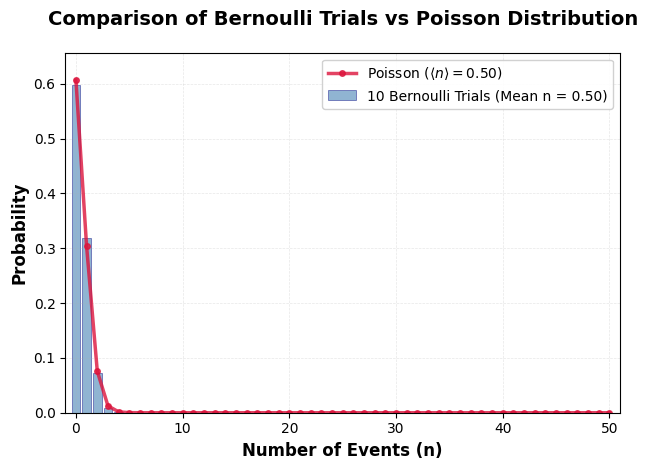

In [64]:
N=50
L=100
Ts = [10]
Ns = np.arange(N+1)
for T in Ts:

    H, mean_n = simulate_dart_throws(N, L, T)  #setting mean n by simulation.

    H = H/np.sum(H)# Normalize histogram to get probabilities

    plt.bar(Ns, H, width=0.8, alpha=0.6, color='steelblue', 
            edgecolor='navy', linewidth=0.5,
            label=f'{T} Bernoulli Trials (Mean n = {mean_n:.2f})')

# Poisson overlay
p_values1 = [p(n, mean_n) for n in Ns]
plt.plot(Ns, p_values1, color='crimson', linewidth=2.5, 
            marker='o', markersize=4, alpha=0.8,
            label=f'Poisson ($\\langle n \\rangle = {mean_n:.2f}$)')

# Styling improvements
plt.xlabel('Number of Events (n)', fontsize=12, fontweight='bold')
plt.ylabel('Probability', fontsize=12, fontweight='bold')
plt.title('Comparison of Bernoulli Trials vs Poisson Distribution', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, framealpha=0.9, loc='best')
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.xlim(-1, N+1)
plt.ylim(0, max(H) * 1.1)  # Add 10% headroom

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-1/Assignments/Comp_Sim_Assignment_4/plots/task2.pdf')
plt.show()

## Task 4

4. Plot both distributions using a log-scale for the vertical axis. Down to what
values of P(n) does your numerical data probe the Poisson distribution?

In [65]:
def smallest_prob(H):
    smallest_prob_probed = np.min(H[np.nonzero(H)])  # Ignore zeros
    return smallest_prob_probed, np.where(H == smallest_prob_probed)[0][0]

smallest_prob_found, n_at_smallest = smallest_prob(H)

/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_39394/1916269703.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(Ns, np.log(H), color='Blue', linewidth=2.5,


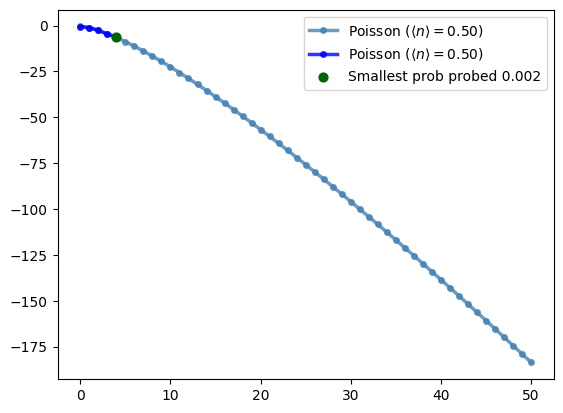

In [66]:
plt.plot(Ns, np.log(p_values1), color='steelblue', linewidth=2.5, 
            marker='o', markersize=4, alpha=0.8,
            label=f'Poisson ($\\langle n \\rangle = {mean_n:.2f}$)')
plt.plot(Ns, np.log(H), color='Blue', linewidth=2.5, 
            marker='o', markersize=4, alpha=0.8,
            label=f'Poisson ($\\langle n \\rangle = {mean_n:.2f}$)')
plt.scatter(n_at_smallest, np.log(smallest_prob_found), color='darkgreen', s=40, zorder=5,
            label=f'Smallest prob probed {smallest_prob_found}')
plt.legend()
plt.show()

## Task 5

5. Repeat the simulations for a different number of trials, T = 100, 1000, and
10000, and record the smallest values of P (n) that you can simulate.

In [67]:
Ts = [100, 1000, 10000]
N=50
L=100
Ns = np.arange(N+1)
for i in range(5):   #repeat 5 times to see variation
    for T in Ts:

        H, mean_n = simulate_dart_throws(N, L, T)
        H = H/np.sum(H)# Normalize histogram to get probabilities
        smalles_prob_found, n_at_smallest = smallest_prob(H)

        print(f"For T={T} the smallest probability obtained was", smalles_prob_found, "at n =", n_at_smallest)
    print("\n")

For T=100 the smallest probability obtained was 0.0001 at n = 5
For T=1000 the smallest probability obtained was 0.00015 at n = 5
For T=10000 the smallest probability obtained was 9e-06 at n = 6


For T=100 the smallest probability obtained was 0.0012 at n = 4
For T=1000 the smallest probability obtained was 1e-05 at n = 6
For T=10000 the smallest probability obtained was 1.5e-05 at n = 6


For T=100 the smallest probability obtained was 0.0001 at n = 5
For T=1000 the smallest probability obtained was 1e-05 at n = 6
For T=10000 the smallest probability obtained was 6e-06 at n = 6


For T=100 the smallest probability obtained was 0.0014 at n = 4
For T=1000 the smallest probability obtained was 2e-05 at n = 6
For T=10000 the smallest probability obtained was 1e-06 at n = 7


For T=100 the smallest probability obtained was 0.0003 at n = 5
For T=1000 the smallest probability obtained was 1e-05 at n = 6
For T=10000 the smallest probability obtained was 1.3e-05 at n = 6




## Task 6

6. Repeat these calculations for L = 5, N = 50 and T = 10, 1000, 10000. What
do you observe?

In [68]:
Ts = [10, 1000, 10000]
N=50
L=5
Ns = np.arange(N+1)
for i in range(5):   #repeat 5 times to see variation
    for T in Ts:

        H, mean_n = simulate_dart_throws(N, L, T)
        H = H/np.sum(H)# Normalize histogram to get probabilities
        smalles_prob_found, n_at_smallest = smallest_prob(H)

        print(f"For T={T} the smallest probability obtained was", smalles_prob_found, "at n =", n_at_smallest)
    print("\n")

For T=10 the smallest probability obtained was 0.02 at n = 3
For T=1000 the smallest probability obtained was 0.0002 at n = 22
For T=10000 the smallest probability obtained was 2e-05 at n = 24


For T=10 the smallest probability obtained was 0.02 at n = 15
For T=1000 the smallest probability obtained was 0.0008 at n = 2
For T=10000 the smallest probability obtained was 2e-05 at n = 0


For T=10 the smallest probability obtained was 0.02 at n = 5
For T=1000 the smallest probability obtained was 0.0002 at n = 21
For T=10000 the smallest probability obtained was 2e-05 at n = 0


For T=10 the smallest probability obtained was 0.04 at n = 14
For T=1000 the smallest probability obtained was 0.0002 at n = 1
For T=10000 the smallest probability obtained was 2e-05 at n = 23


For T=10 the smallest probability obtained was 0.02 at n = 19
For T=1000 the smallest probability obtained was 0.0008 at n = 19
For T=10000 the smallest probability obtained was 2e-05 at n = 0




**Sanity Check using Scipy libraries**

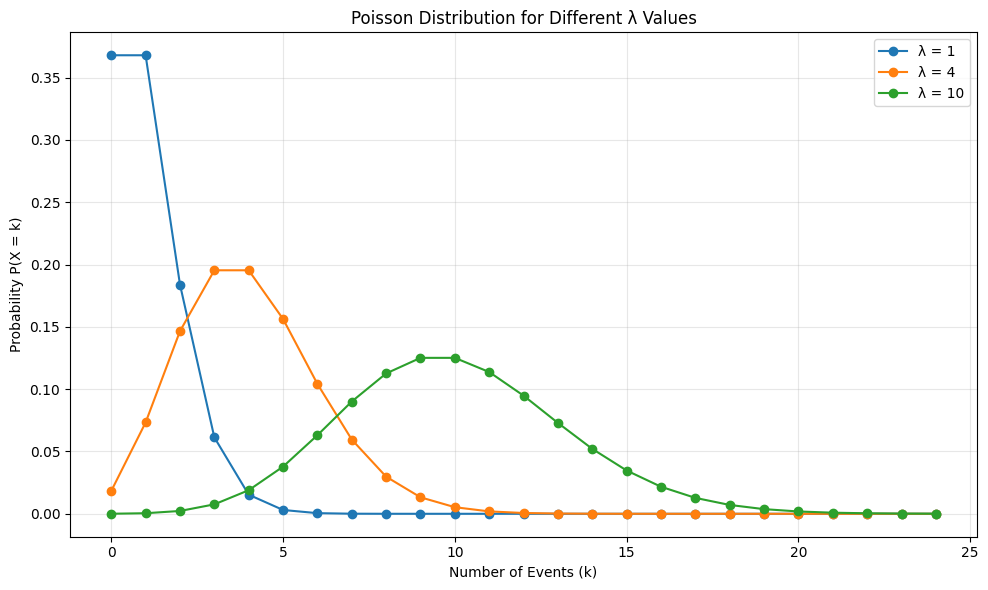

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_values = [1, 4, 10]  # Different rate parameters
x = np.arange(0, 25)

# Create plot
plt.figure(figsize=(10, 6))

for lam in lambda_values:
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, marker='o', linestyle='-', label=f'λ = {lam}')

plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X = k)')
plt.title('Poisson Distribution for Different λ Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

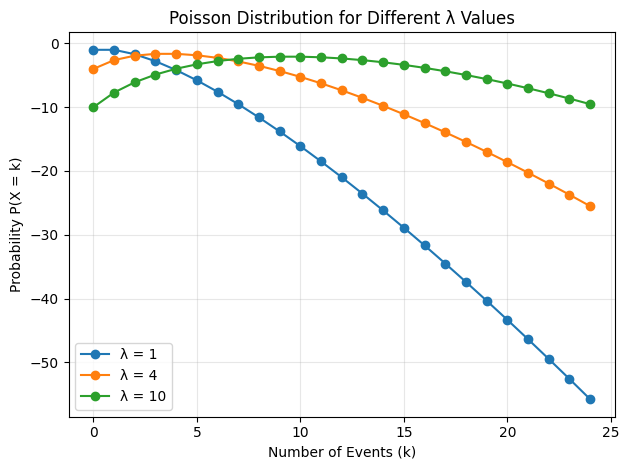

In [70]:

for lam in lambda_values:
    pmf = poisson.pmf(x, lam)
    plt.plot(x, np.log(pmf), marker='o', linestyle='-', label=f'λ = {lam}')
    
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X = k)')
plt.title('Poisson Distribution for Different λ Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()